Saving student_depression_dataset.csv to student_depression_dataset (5).csv
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       M

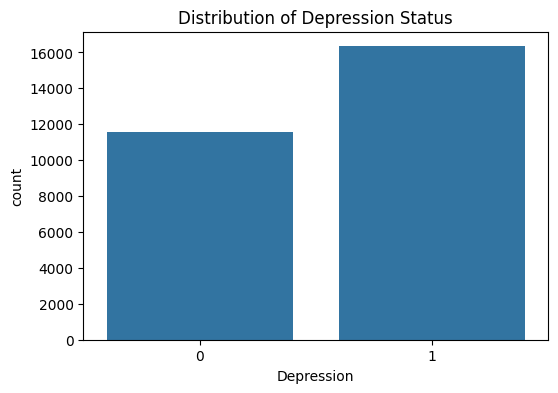

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3470
           1       0.86      0.89      0.87      4901

    accuracy                           0.85      8371
   macro avg       0.84      0.84      0.84      8371
weighted avg       0.85      0.85      0.85      8371

--- Confusion Matrix ---
[[2747  723]
 [ 553 4348]]
--- ROC-AUC Score ---
ROC-AUC Score: 0.8394


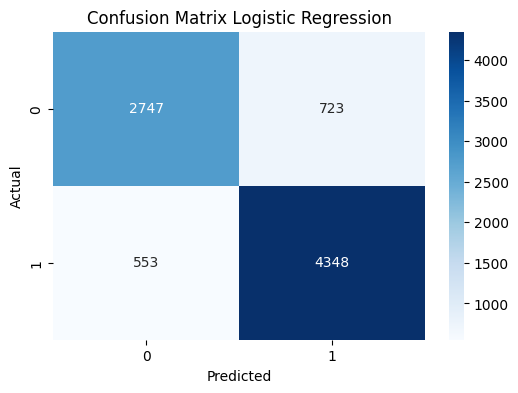

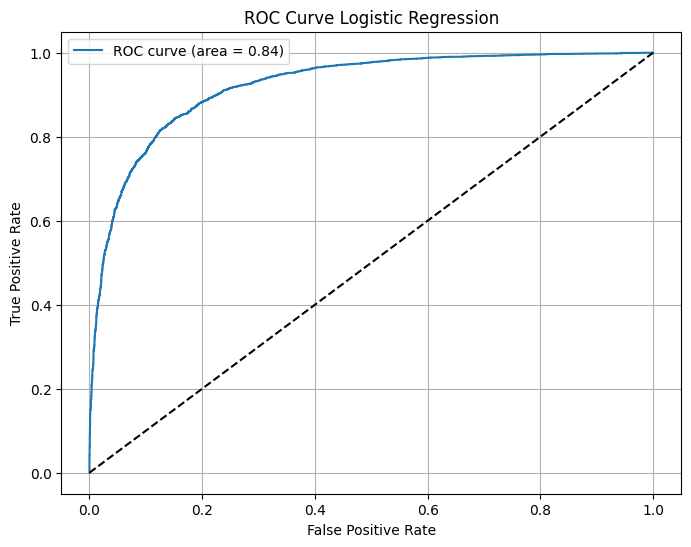

In [7]:
# 1. Install library tambahan kalau belum ada
!pip install -q scikit-learn

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# 3. Upload file dari lokal
from google.colab import files
uploaded = files.upload()

# 4. Load dataset
# Pastikan nama file sesuai dengan file yang kamu upload
data = pd.read_csv('student_depression_dataset.csv')

# 5. EDA Singkat
print(data.head())
print(data.info())
print(data.describe())

# 6. Cek missing value
print("\nMissing Values:\n", data.isnull().sum())

# 7. (Optional) Visualisasi target
plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=data)
plt.title('Distribution of Depression Status')
plt.show()

# 8. Encoding Categorical Features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Depression':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# 9. Feature dan Target
X = data.drop('Depression', axis=1)
y = data['Depression']

# 10. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11. Split data Train - Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 12. Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# 13. Evaluasi Model
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("--- ROC-AUC Score ---")
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 14. Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 15. Plot ROC Curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()
